In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Vish.csv')

In [4]:
df.head()

,Employee ID,Departments,Promoted,Review,Projects,Salary,Tenure,Satisfaction,avg_hrs_month,left
0,30018087,sales,0,0.53,2,low,3,0.38,157,1
1,30018088,sales,0,0.86,5,medium,6,0.80,262,1
2,30018089,sales,0,0.88,7,medium,4,0.11,272,1
3,30018090,sales,0,0.87,5,low,5,0.72,223,1
4,30018091,sales,0,0.52,2,low,3,0.37,159,1


## Data Exploration

#### How many columns are there in dataset ?

In [5]:
df.columns

Index(['Employee ID', 'Departments ', 'Promoted', 'Review', 'Projects',
       'Salary', 'Tenure', 'Satisfaction', 'avg_hrs_month', 'left'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    14999 non-null  int64  
 1   Departments    14999 non-null  object 
 2   Promoted       14999 non-null  int64  
 3   Review         14999 non-null  float64
 4   Projects       14999 non-null  int64  
 5   Salary         14999 non-null  object 
 6   Tenure         14999 non-null  int64  
 7   Satisfaction   14999 non-null  float64
 8   avg_hrs_month  14999 non-null  int64  
 9   left           14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Is there any ambiguity in the dataset ?

In [7]:
if df['Employee ID'].nunique() == df.shape[0]:
  print('All the IDs are unique and NO ambiguity in Employee ID')
else:
  print('Ambiquity in the dataset')

All the IDs are unique and NO ambiguity in Employee ID


In [9]:
df['Tenure'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [12]:
df['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
df['Projects'].unique()

array([2, 5, 7, 6, 4, 3])

In [18]:
print(df['avg_hrs_month'].unique())
print('There are {} unique values in the dataset'.format(df['avg_hrs_month'].nunique()))

[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162 215 193 176 191 174 201 208 171 111 104 106 100 194 209 185 200
 207 187 210 186 167 108 122 110 115 197 102 109 190  99 101  97 173 121
 170 105 118 119 117 114  96  98 107 123 116 125 113 120 112 124 103]
There are 215 unique values in the dataset




*   Review and satisfication have continuous values.
*   Department, Tenure, Project and avg hrs of work monthly has its Nominal Values, and there is no ambiguity in the columns



## Separate Feature Analysis

#### Department

In [30]:
x = list(df['Departments '].unique())
y = df.shape[0]
for depart in x:
    num = df['Departments '][df['Departments '] == depart].value_counts()
    print('The "{}" department has {}% employees'.format(depart, float(num/y)*100))

The "sales" department has 27.601840122674844% employees
The "accounting" department has 5.113674244949664% employees
The "hr" department has 4.926995133008867% employees
The "technical" department has 18.13454230282019% employees
The "support" department has 14.860990732715514% employees
The "management" department has 4.200280018667911% employees
The "IT" department has 8.180545369691313% employees
The "product_mng" department has 6.0137342489499295% employees
The "marketing" department has 5.72038135875725% employees
The "RandD" department has 5.247016467764517% employees


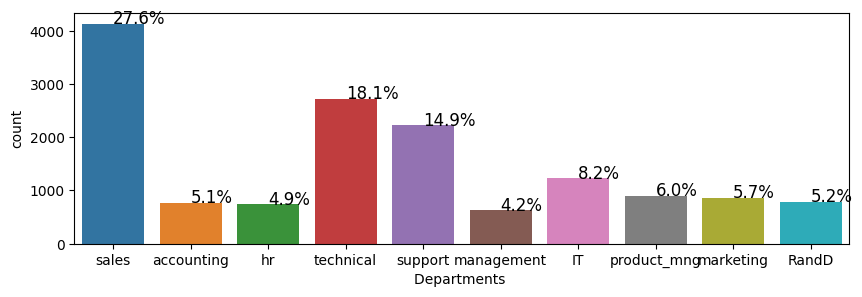

In [40]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

# plotring the graph
plt.figure(figsize=(10,3))
ax4 = sns.countplot( x= 'Departments ', data = df)
without_hue(ax4, df['Departments '] )

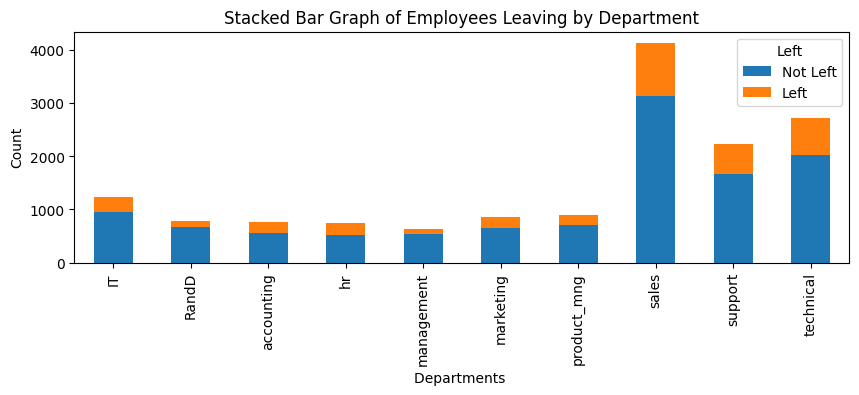

In [73]:
department_counts = df.groupby(['Departments ', 'left'])['left'].count().unstack().fillna(0)

department_counts.plot(kind='bar', stacked=True, figsize=(10, 3))
plt.title('Stacked Bar Graph of Employees Leaving by Department')
plt.xlabel('Departments ')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.show()

In [63]:
department_counts

left,0,1
Departments,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [71]:
depart = list(department_counts.index)
for i in range(10):
    x = department_counts.iloc[i, 0]
    y = department_counts.iloc[i, 1]
    print(depart[i])
    print('{}% - retained || {}% - left'.format(float(x/(x+y))*100, float(y/(x+y))*100))
    print()

IT
77.75061124694376% - retained || 22.249388753056234% - left

RandD
84.62515883100382% - retained || 15.374841168996186% - left

accounting
73.40286831812256% - retained || 26.597131681877446% - left

hr
70.90663058186739% - retained || 29.093369418132614% - left

management
85.55555555555556% - retained || 14.444444444444443% - left

marketing
76.34032634032634% - retained || 23.65967365967366% - left

product_mng
78.04878048780488% - retained || 21.951219512195124% - left

sales
75.5072463768116% - retained || 24.492753623188406% - left

support
75.10094212651414% - retained || 24.89905787348587% - left

technical
74.375% - retained || 25.624999999999996% - left



Except RandD and management, all have t he attrition percentage of greated than 20%

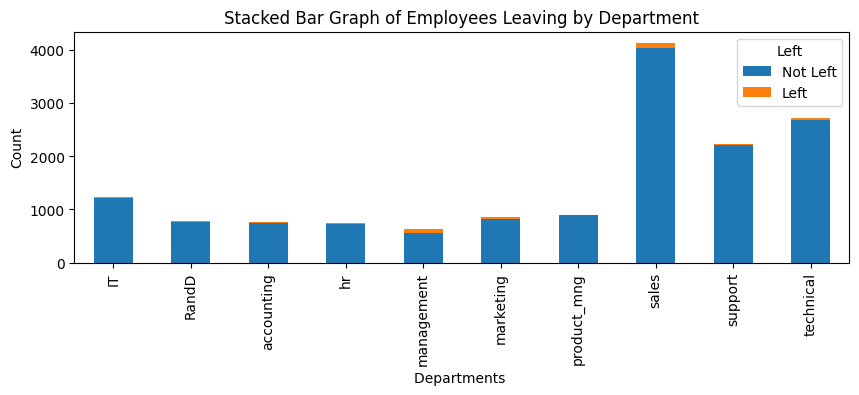

In [75]:
department_counts = df.groupby(['Departments ', 'Promoted'])['Promoted'].count().unstack()

department_counts.plot(kind='bar', stacked=True, figsize=(10, 3))
plt.title('Stacked Bar Graph of Employees Leaving by Department')
plt.xlabel('Departments ')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.show()

It is clear that a very small number of total branch size is promoted.

#### Salary

In [80]:
x = list(df['Salary'].unique())
y = df.shape[0]
for range in x:
    num = df['Salary'][df['Salary'] == range].value_counts()
    print('The "{}" department has {}% employees'.format(range, float(num/y)*100))

The "low" department has 48.77658510567372% employees
The "medium" department has 42.97619841322755% employees
The "high" department has 8.24721648109874% employees


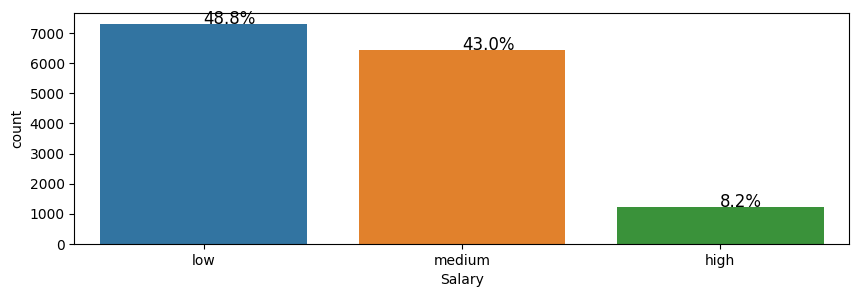

In [81]:
plt.figure(figsize=(10,3))
ax4 = sns.countplot( x= 'Salary', data = df)
without_hue(ax4, df['Salary'] )

Company has large number of Low Salaried Employee

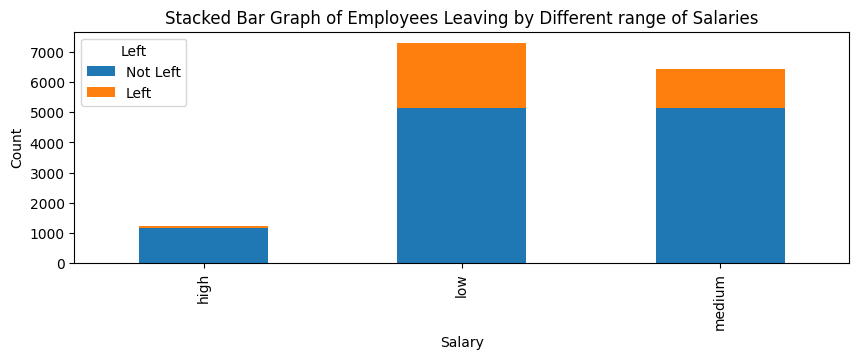

In [84]:
salary_counts = df.groupby(['Salary', 'left'])['left'].count().unstack().fillna(0)

salary_counts.plot(kind='bar', stacked=True, figsize=(10, 3))
plt.title('Stacked Bar Graph of Employees Leaving by Different range of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.show()

It is obvious from the plot : Large Number of Low Salaried Employee Leaving the Company. The Attrition rate of high salaried employee is very low.

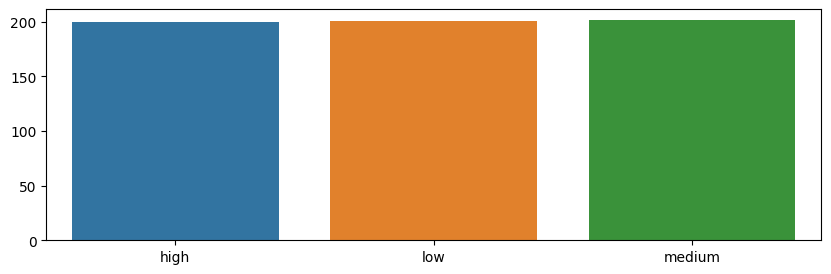

In [94]:
salary_work_hrs_sum = df.groupby(['Salary'])['avg_hrs_month'].sum()
salary_wise_count = df.groupby(['Salary'])['avg_hrs_month'].count()
per_person_work = [float(salary_work_hrs_sum[0]/salary_wise_count[0]), float(salary_work_hrs_sum[1]/salary_wise_count[1]), float(salary_work_hrs_sum[2]/salary_wise_count[2])]
salary_cat = ['high', 'low', 'medium']
plt.figure(figsize=(10,3))
sns.barplot(x = salary_cat, y = per_person_work)
plt.show()

Hence, Work hour per person in each group is almost same.